In [2]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load & Reading Data 

In [3]:
df = pd.read_csv('../Data/train.csv')

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Data Cleaning & EDA 

In [5]:
# Looking into null values 
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
# Dropping unnecessary columns/rows
df.drop(columns = ['location'], axis = 1, inplace = True)

In [7]:
df.dropna(inplace = True)

In [8]:
df.head()

,id,keyword,text,target
31,48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,Crying out for more! Set me ablaze,0
35,53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


In [9]:
df.isnull().sum()

id         0
keyword    0
text       0
target     0
dtype: int64

### Relevant vs Not Relevant Breakdown

In [10]:
df['target'].value_counts(normalize = True )

0    0.572431
1    0.427569
Name: target, dtype: float64

In [11]:
df['keyword'].describe()

count           7552
unique           221
top       fatalities
freq              45
Name: keyword, dtype: object

In [12]:
df['keyword'].value_counts( normalize = True).head(20)

fatalities     0.005959
armageddon     0.005561
deluge         0.005561
harm           0.005429
damage         0.005429
sinking        0.005429
body%20bags    0.005429
twister        0.005297
collided       0.005297
siren          0.005297
windstorm      0.005297
outbreak       0.005297
evacuate       0.005297
fear           0.005297
explosion      0.005164
weapon         0.005164
sunk           0.005164
sinkhole       0.005164
collision      0.005164
weapons        0.005164
Name: keyword, dtype: float64

### **List of top 20 keywords indicating RELEVANCY:** 

In [13]:
relevant_mask = df[df['target']== 1]

In [14]:
relevant_words = relevant_mask['keyword'].value_counts(ascending = False).head(20)

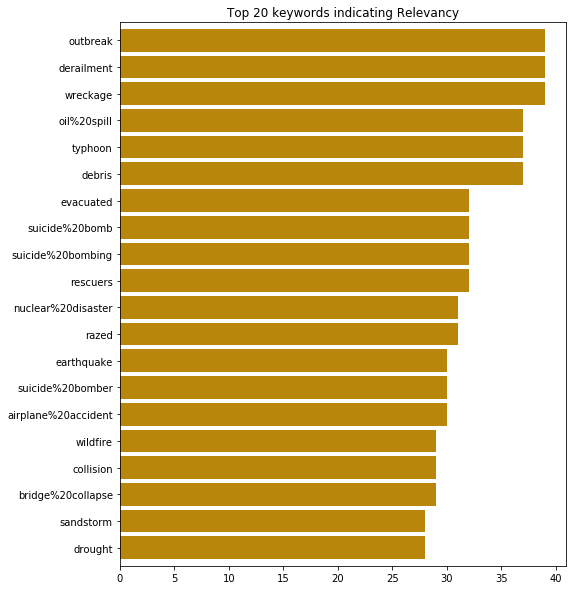

In [16]:
ax = relevant_words.plot(kind = 'barh', figsize=(8, 10), 
                     color='darkgoldenrod', zorder=2, 
                        width=0.85)
plt.title("Top 20 keywords indicating Relevancy")
ax.invert_yaxis()
plt.savefig('../plots/relevancy.png', dpi = 300);

### List of top 20 keywords indicating IRRELEVANCY

In [18]:
irrelevant_mask = df[df['target']== 0]

In [19]:
irrelevant_words = irrelevant_mask['keyword'].value_counts(ascending = False).head(20)

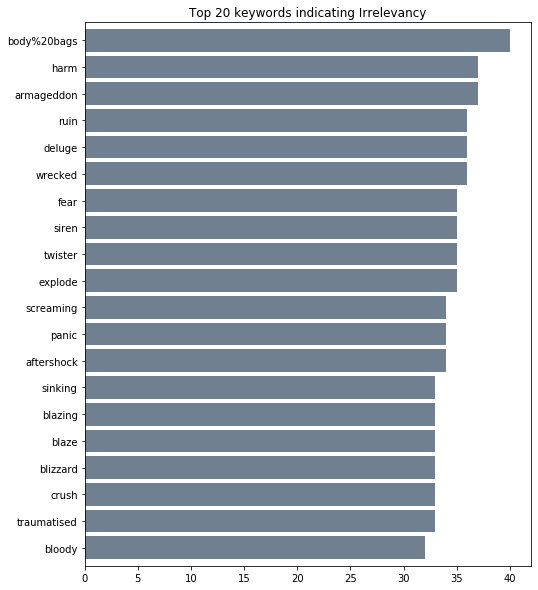

In [20]:
ax = irrelevant_words.plot(kind = 'barh', figsize=(8, 10), 
                     color='slategray', zorder=2, 
                        width=0.85)
plt.title("Top 20 keywords indicating Irrelevancy")
ax.invert_yaxis()
plt.savefig('../plots/irrelevancy.png', dpi = 300);